In [16]:

import numpy as np
import pandas as pd
import os
import random

import datetime as dt
from matplotlib import pyplot as plt


# For reading in the data in various forms
from netCDF4 import Dataset
import xarray as xr


In [97]:
# Read in various event files for Halloween storm 2003

base_dir = '/Users/ryanmcgranaghan/Documents/NSF_CHESS/github_pages/NSF_CHESS/'

#---------------------------------------------------------------------
# Historic data for Halloween 2003 storm
file_actual = os.path.join(base_dir,'data/synthetic_sw_data/omni_2003.asc')
header_actual = os.path.join(base_dir,'data/synthetic_sw_data/omni_2003_header.txt')
f = open(file_actual)
event_actual = f.read().split('\n')
# event_actual = [float(x) for x in event_actual]
f.close()

f = open(header_actual)
header_actual = f.read().split('\n')
f.close()
label_actual = 'Halloween 2003 Storm'

#---------------------------------------------------------------------
# Karthik-generated synthetic data
# file1_plus = os.path.join(base_dir,'data/synthetic_sw_data/halloween_storm_plus_1min.nc')
# event1_plus = Dataset(file1_plus)
# file1_minus = os.path.join(base_dir,'data/synthetic_sw_data/halloween_storm_minus_1min.nc')
# event1_minus = Dataset(file1_minus)
file1_plus = os.path.join(base_dir,'data/synthetic_sw_data/halloween_storm_plus.nc')
event1_plus = Dataset(file1_plus)
file1_minus = os.path.join(base_dir,'data/synthetic_sw_data/halloween_storm_minus.nc')
event1_minus = Dataset(file1_minus)
label1 = 'Modulated Halloween 2003 Storm'


#---------------------------------------------------------------------
# Chigo-generated synthetic data
# These data were shared in personal communication and have not yet been used to generate a paper
file2 = os.path.join(base_dir,'data/synthetic_sw_data/Ngwira_data/Ngwira_synthetic_storm.txt')
f = open(file2)
event2 = f.read().split('\n')
f.close()
label2 = 'Ngwira unpublished, [2022]'


#---------------------------------------------------------------------
# Ngwira-generated synthetic data
# From [Ngwira et al., 2014]
#   --> Ngwira, C. M., Pulkkinen, A., Kuznetsova, M. M., and Glocer, A. (2014), 
#       Modeling extreme “Carrington-type” space weather events using three-dimensional global MHD simulations, 
#       J. Geophys. Res. Space Physics, 119, 4456– 4474, doi:10.1002/2013JA019661.
file5 = os.path.join(base_dir,'data/synthetic_sw_data/Ngwira_data/Ngwira_synthetic_storm_2014.txt')
f = open(file5)
event5 = f.read().split('\n')
f.close()
label5 = 'Ngwira et al, [2014]'



#---------------------------------------------------------------------
# UMich-generated synthetic data


#Solar wind data containing 15 space separated columns per line. 
# The first 7 columns are integers containing the date and time from year down to milliseconds in coordinated universal time, UTC. 
# The next three columns contain the 3 components of the interplanetary magnetic field BSW in nT
# The next 3 columns are the 3 components of the velocity vSW in km/s
# The next column is the number density nSW in cm-3
# The last column is the ion temperature TSW in K. 
# The vector quantities are in the GSM coordinate system by default
# Since BATS-R-US runs in single fluid MHD mode in the Geospace model using protons and negligible electron temperature, the mass density will be the number density times the proton mass, and the thermal pressure will be pSW = nSWkTSW.

# 0: yr
# 1: mo
# 2: dy
# 3: hr
# 4: mt
# 5: se
# 6: millisec
# 7: Bx
# 8: By
# 9: Bz
# 10: Vx
# 11: Vy
# 12: Vz
# 13: num den
# 14: Ti


#---------------------------------------------------------------------
# Welling-generated synthetic data
# https://zenodo.org/record/3620786
file3 = os.path.join(base_dir,'data/synthetic_sw_data/Welling_data/imf_extreme_southBz.dat')
f = open(file3)
event3 = f.read().split('\n')
f.close()
label3 = 'Welling et al, [2021]'


#---------------------------------------------------------------------
# Blake-generated synthetic data
# https://zenodo.org/record/4534660
file4 = os.path.join(base_dir,'data/synthetic_sw_data/Blake_data/SCENARIO1.txt')
f = open(file4)
event4 = f.read().split('\n')
f.close()
label4 = 'Blake et al, [2021]'






In [33]:
event2

['Yr Mon Day Hr Min Sec Msec Bx[nT] By[nT] Bz[nT] Vx[km/s] Vy[km/s] Vz[km/s] N[cm^(-3)] T[Kelvin]',
 '2003,10,29,0,0,0,0,0,2.52,-0.41,368,0,0,3.01,55605',
 '2003,10,29,0,1,0,0,0,2.21,-1.7,365.4,0,0,3.06,43904',
 '2003,10,29,0,2,0,0,0,1.9,-1.7,369.2,0,0,3.09,30353',
 '2003,10,29,0,3,0,0,0,1.8,-1.46,368.4,0,0,2.79,27745',
 '2003,10,29,0,4,0,0,0,1.38,-1.25,370.4,0,0,3,51761',
 '2003,10,29,0,5,0,0,0,1.76,-1.24,366.1,0,0,3.01,50621',
 '2003,10,29,0,6,0,0,0,2.12,-0.84,366.6,0,0,3.04,65813',
 '2003,10,29,0,7,0,0,0,1.95,-1.27,374.6,0,0,3.04,63877',
 '2003,10,29,0,8,0,0,0,1.81,0.99,368.2,0,0,3.05,54025',
 '2003,10,29,0,9,0,0,0,1.81,0.72,374.7,0,0,2.86,41949',
 '2003,10,29,0,10,0,0,0,2.25,0.63,375.4,0,0,3.34,42435',
 '2003,10,29,0,11,0,0,0,2.47,1.21,368.6,0,0,3.36,53136',
 '2003,10,29,0,12,0,0,0,2.85,-1.05,370.4,0,0,3.09,49186',
 '2003,10,29,0,13,0,0,0,2.76,1.75,369.5,0,0,3.3,48828',
 '2003,10,29,0,14,0,0,0,2.76,2.03,373.2,0,0,3.47,43951',
 '2003,10,29,0,15,0,0,0,3.14,1.81,374.8,0,0,3.28,47036',

In [32]:
event5

['Yr Mon Day Hr Min Sec Msec Bx[nT] By[nT] Bz[nT] Vx[km/s] Vy[km/s] Vz[km/s] N[cm^(-3)] T[Kelvin]',
 '2003 9 2 0 0 0 0 0 0.52 -1.29 -416.17 14.006 -1.9773 1.82 38834',
 '2003 9 2 0 1 0 0 0 0.82 -0.21 -418.31 5.2548 8.9304 1.83 49874',
 '2003 9 2 0 2 0 0 0 1.3 -1.16 -416.63 -0.43509 15.702 1.86 53938',
 '2003 9 2 0 3 0 0 0 2.75 -5.23 -415.77 2.7367 -2.9694 1.57 54186',
 '2003 9 2 0 4 0 0 0 3.13 -3.23 -418.31 -23.476 4.9152 2.32 59042',
 '2003 9 2 0 5 0 0 0 3.6 2.43 -416.63 -1.2681 -3.5745 1.32 48872',
 '2003 9 2 0 6 0 0 0 11.17 5.64 -415.77 24.059 3.444 1.98 46922',
 '2003 9 2 0 7 0 0 0 13.05 0.92 -418.52 1.4752 6.6 1.11 43508',
 '2003 9 2 0 8 0 0 0 12.03 -1.38 -421.58 0.62061 -9.253 1.91 47426',
 '2003 9 2 0 9 0 0 0 13.25 -2.84 -420.6 -11.013 4.1226 2.29 53023',
 '2003 9 2 0 10 0 0 0 10.91 -0.29 -418.52 -0.46221 9.0165 2.29 48103',
 '2003 9 2 0 11 0 0 0 12.87 -0.21 -421.58 3.4853 1.3846 1.89 48830',
 '2003 9 2 0 12 0 0 0 13.92 1.71 -420.6 6.3959 25.948 2.93 42413',
 '2003 9 2 0 13 0 0 

In [21]:
header_actual

['  FORMAT OF THE SUBSETTED FILE',
 '    ',
 '    ITEMS                      FORMAT   ',
 '     ',
 ' 1 YEAR                          I4        ',
 ' 2 DOY                           I4        ',
 ' 3 Hour                          I3        ',
 ' 4 Scalar_B nT                   F6.1      ',
 ' 5 BX  nT (GSE, GSM)             F6.1      ',
 ' 6 BY  nT (GSE)                  F6.1      ',
 ' 7 BZ  nT (GSE)                  F6.1      ',
 ' 8 SW_Plasma_Temperature  K      F9.0      ',
 ' 9 SW_Proton_Density  N/cm^3     F6.1      ',
 '10 SW_Plasma_Speed  km/s         F6.0      ',
 '11 Kp index                      I3        ',
 '12 ap_index  nT                  I4        ',
 '13 f10.7_index                   F6.1      ',
 '14 AE-index  nT                  I5        ',
 '']

In [4]:
# Prepare the OMNI event data

yr_actual = [int(event_actual[l].split()[0]) for l in range(len(event_actual)-1)]
doy_actual = [int(event_actual[l].split()[1]) for l in range(len(event_actual)-1)]
hr_actual = [int(event_actual[l].split()[2]) for l in range(len(event_actual)-1)]
dt_actual = []
for d in range(len(yr_actual)):
    dt_actual.append(dt.datetime(yr_actual[d],1,1,hr_actual[d]) + dt.timedelta(doy_actual[d] - 1))

AE_actual = [float(event_actual[l].split()[-1]) for l in range(len(event_actual)-1)]
Bx_actual = [float(event_actual[l].split()[4]) for l in range(len(event_actual)-1)]
By_actual = [float(event_actual[l].split()[5]) for l in range(len(event_actual)-1)]
Bz_actual = [float(event_actual[l].split()[6]) for l in range(len(event_actual)-1)]

# pd_actual = pd.DataFrame(np.column_stack([dt_actual,AE_actual]),columns=['datetimes','AE'])
pd_actual = pd.DataFrame(np.column_stack([dt_actual,AE_actual,Bx_actual,By_actual,Bz_actual]),columns=['datetimes','AE','Bx','By','Bz'])




In [7]:
event1_plus.variables

{'index': <class 'netCDF4._netCDF4.Variable'>
 int64 index(index)
 unlimited dimensions: 
 current shape = (337,)
 filling on, default _FillValue of -9223372036854775806 used,
 'datetime': <class 'netCDF4._netCDF4.Variable'>
 int64 datetime(index)
     units: hours since 2003-10-25 00:00:00
     calendar: proleptic_gregorian
 unlimited dimensions: 
 current shape = (337,)
 filling on, default _FillValue of -9223372036854775806 used,
 'Scalar_B': <class 'netCDF4._netCDF4.Variable'>
 float64 Scalar_B(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BX': <class 'netCDF4._netCDF4.Variable'>
 float64 BX(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BY': <class 'netCDF4._netCDF4.Variable'>
 float64 BY(index)
     _FillValue: nan
     units: nT
 unlimited dimensions: 
 current shape = (337,)
 filling on,
 'BZ': <class 'netCDF4._netCDF4.Variable'>
 float64 BZ(index)
     _FillVa

In [9]:
pd_event1_plus[pd_event1_plus['datetimes'] > dt.datetime(2004,1,1)]

NameError: name 'pd_event1_plus' is not defined

In [38]:
event1_plus.variables['datetime'][pd_event1_plus['datetimes'] > dt.datetime(2004,1,1)]

masked_array(data=[ 1633,  1634,  1635, ..., 20158, 20159, 20160],
             mask=False,
       fill_value=999999)

In [ ]:
# Prepare event 1 data - for minute resolution data files
dt_event1_plus = []
base_dt_event1_plus = dt.datetime(2003,10,25)
for d in range(len(event1_plus.variables['datetime'])):
    dt_event1_plus.append(base_dt_event1_plus + dt.timedelta(hours=int(event1_plus.variables['datetime'][d].data)))

pd_event1_plus = pd.DataFrame(np.column_stack([dt_event1_plus,event1_plus.variables['AE'][:].data,event1_plus.variables['bx'][:].data,event1_plus.variables['by'][:].data,event1_plus.variables['bz'][:].data]),
                                         columns=['datetimes','AE','Bx','By','Bz'])


    


dt_event1_minus = []
base_dt_event1_minus = dt.datetime(2003,10,25)
for d in range(len(event1_minus.variables['datetime'])):
    dt_event1_minus.append(base_dt_event1_minus + dt.timedelta(hours=int(event1_minus.variables['datetime'][d].data)))

pd_event1_minus = pd.DataFrame(np.column_stack([dt_event1_minus,event1_minus.variables['AE'][:].data,event1_minus.variables['bx'][:].data,event1_minus.variables['by'][:].data,event1_minus.variables['bz'][:].data]),
                                         columns=['datetimes','AE','Bx','By','Bz'])


In [13]:
# Prepare event 1 data - for hour resolution data files
dt_event1_plus = []
base_dt_event1_plus = dt.datetime(2003,10,25)
for d in range(len(event1_plus.variables['datetime'])):
    dt_event1_plus.append(base_dt_event1_plus + dt.timedelta(hours=int(event1_plus.variables['datetime'][d].data)))

pd_event1_plus = pd.DataFrame(np.column_stack([dt_event1_plus,event1_plus.variables['AE-index'][:].data,event1_plus.variables['BX'][:].data,event1_plus.variables['BY'][:].data,event1_plus.variables['BZ'][:].data]),
                                         columns=['datetimes','AE','Bx','By','Bz'])


    


dt_event1_minus = []
base_dt_event1_minus = dt.datetime(2003,10,25)
for d in range(len(event1_minus.variables['datetime'])):
    dt_event1_minus.append(base_dt_event1_minus + dt.timedelta(hours=int(event1_minus.variables['datetime'][d].data)))

pd_event1_minus = pd.DataFrame(np.column_stack([dt_event1_minus,event1_minus.variables['AE-index'][:].data,event1_minus.variables['BX'][:].data,event1_minus.variables['BY'][:].data,event1_minus.variables['BZ'][:].data]),
                                         columns=['datetimes','AE','Bx','By','Bz'])


In [14]:
pd_event1_plus

,datetimes,AE,Bx,By,Bz
0,2003-10-25 00:00:00,155.0,2.718101,20.0,170.344214
1,2003-10-25 01:00:00,312.5,-9.781899,-19.5,155.344214
2,2003-10-25 02:00:00,336.25,-16.781899,-44.0,48.344214
3,2003-10-25 03:00:00,113.75,-49.281899,33.5,42.844214
4,2003-10-25 04:00:00,123.75,-23.281899,-25.5,43.344214
...,...,...,...,...,...
332,2003-11-07 20:00:00,91.25,8.718101,-10.5,5.344214
333,2003-11-07 21:00:00,91.25,14.718101,-3.0,15.344214
334,2003-11-07 22:00:00,56.25,-7.281899,-4.5,-0.155786
335,2003-11-07 23:00:00,162.5,-13.281899,-1.5,-6.655786


In [28]:
# Construct a smooth time series between the plus/minus envelope for event1
sampled_Bx = []
sampled_By = []
sampled_Bz = []

for t in range(len(pd_event1_minus)):
    sampled_Bx.append( random.uniform(pd_event1_minus['Bx'][t],pd_event1_plus['Bx'][t]) )
    sampled_By.append( random.uniform(pd_event1_minus['By'][t],pd_event1_plus['By'][t]) )
    sampled_Bz.append( random.uniform(pd_event1_minus['Bz'][t],pd_event1_plus['Bz'][t]) )
    
    
pd_event1_sampled = pd.DataFrame(np.column_stack([dt_event1_plus,sampled_Bx,sampled_By,sampled_Bz]),
                                         columns=['datetimes','Bx','By','Bz'])
    
        

In [178]:
# Header information for event2
event2[0]

'Yr Mon Day Hr Min Sec Msec Bx[nT] By[nT] Bz[nT] Vx[km/s] Vy[km/s] Vz[km/s] N[cm^(-3)] T[Kelvin]'

In [98]:
# Prepare event 2 data

yr_event2 = [int(event2[l].split(',')[0]) for l in range(1,len(event2)-1)]
mo_event2 = [int(event2[l].split(',')[1]) for l in range(1,len(event2)-1)]
dy_event2 = [int(event2[l].split(',')[2]) for l in range(1,len(event2)-1)]
hr_event2 = [int(event2[l].split(',')[3]) for l in range(1,len(event2)-1)]
mt_event2 = [int(event2[l].split(',')[4]) for l in range(1,len(event2)-1)]
se_event2 = [int(event2[l].split(',')[5]) for l in range(1,len(event2)-1)]

dt_event2 = []
for d in range(len(yr_event2)):
    dt_event2.append(dt.datetime(yr_event2[d],mo_event2[d],dy_event2[d],hr_event2[d],mt_event2[d]))

Bx_event2 = [float(event2[l].split(',')[7]) for l in range(1,len(event2)-1)]
By_event2 = [float(event2[l].split(',')[8]) for l in range(1,len(event2)-1)]
Bz_event2 = [float(event2[l].split(',')[9]) for l in range(1,len(event2)-1)]

pd_event2 = pd.DataFrame(np.column_stack([dt_event2,Bx_event2,By_event2,Bz_event2]),columns=['datetimes','Bx','By','Bz'])






In [99]:
# Prepare event 5 data

yr_event5 = [int(event5[l].split(' ')[0]) for l in range(1,len(event5)-1)]
mo_event5 = [int(event5[l].split(' ')[1]) for l in range(1,len(event5)-1)]
dy_event5 = [int(event5[l].split(' ')[2]) for l in range(1,len(event5)-1)]
hr_event5 = [int(event5[l].split(' ')[3]) for l in range(1,len(event5)-1)]
mt_event5 = [int(event5[l].split(' ')[4]) for l in range(1,len(event5)-1)]
se_event5 = [int(event5[l].split(' ')[5]) for l in range(1,len(event5)-1)]

dt_event5 = []
for d in range(len(yr_event5)):
    dt_event5.append(dt.datetime(yr_event5[d],mo_event5[d],dy_event5[d],hr_event5[d],mt_event5[d]))

Bx_event5 = [float(event5[l].split(' ')[7]) for l in range(1,len(event5)-1)]
By_event5 = [float(event5[l].split(' ')[8]) for l in range(1,len(event5)-1)]
Bz_event5 = [float(event5[l].split(' ')[9]) for l in range(1,len(event5)-1)]

pd_event5 = pd.DataFrame(np.column_stack([dt_event5,Bx_event5,By_event5,Bz_event5]),columns=['datetimes', 'Bx', 'By', 'Bz'])




In [100]:
# Prepare event 3 data

yr_event3 = [int(event3[l].split()[0]) for l in range(3,len(event3)-1)]
mo_event3 = [int(event3[l].split()[1]) for l in range(3,len(event3)-1)]
dy_event3 = [int(event3[l].split()[2]) for l in range(3,len(event3)-1)]
hr_event3 = [int(event3[l].split()[3]) for l in range(3,len(event3)-1)]
mt_event3 = [int(event3[l].split()[4]) for l in range(3,len(event3)-1)]
se_event3 = [int(event3[l].split()[5]) for l in range(3,len(event3)-1)]

dt_event3 = []
for d in range(len(yr_event3)):
    dt_event3.append(dt.datetime(yr_event3[d],mo_event3[d],dy_event3[d],hr_event3[d],mt_event3[d],se_event3[d]))

Bx_event3 = [float(event3[l].split()[7]) for l in range(3,len(event3)-1)]
By_event3 = [float(event3[l].split()[8]) for l in range(3,len(event3)-1)]
Bz_event3 = [float(event3[l].split()[9]) for l in range(3,len(event3)-1)]

pd_event3 = pd.DataFrame(np.column_stack([dt_event3,Bx_event3,By_event3,Bz_event3]),columns=['datetimes','Bx','By','Bz'])






In [101]:
# Prepare event 4 data
# Year, Month, Day, Hour, Minute, Second, Milisecond, Bx(nT), By(nT), Bz(nT), Vx(km/s), Vy(km/s), Vz(km/s), n(cm^-3), T(K)

yr_event4 = [int(float(event4[l].split()[0])) for l in range(9,len(event4)-1)]
mo_event4 = [int(float(event4[l].split()[1])) for l in range(9,len(event4)-1)]
dy_event4 = [int(float(event4[l].split()[2])) for l in range(9,len(event4)-1)]
hr_event4 = [int(float(event4[l].split()[3])) for l in range(9,len(event4)-1)]
mt_event4 = [int(float(event4[l].split()[4])) for l in range(9,len(event4)-1)]
se_event4 = [int(float(event4[l].split()[5])) for l in range(9,len(event4)-1)]

dt_event4 = []
for d in range(len(yr_event4)):
    dt_event4.append(dt.datetime(yr_event4[d],mo_event4[d],dy_event4[d],hr_event4[d],mt_event4[d],se_event4[d]))

Bx_event4 = [float(event4[l].split()[7]) for l in range(9,len(event4)-1)]
By_event4 = [float(event4[l].split()[8]) for l in range(9,len(event4)-1)]
Bz_event4 = [float(event4[l].split()[9]) for l in range(9,len(event4)-1)]

pd_event4 = pd.DataFrame(np.column_stack([dt_event4,Bx_event4,By_event4,Bz_event4]),columns=['datetimes','Bx','By','Bz'])






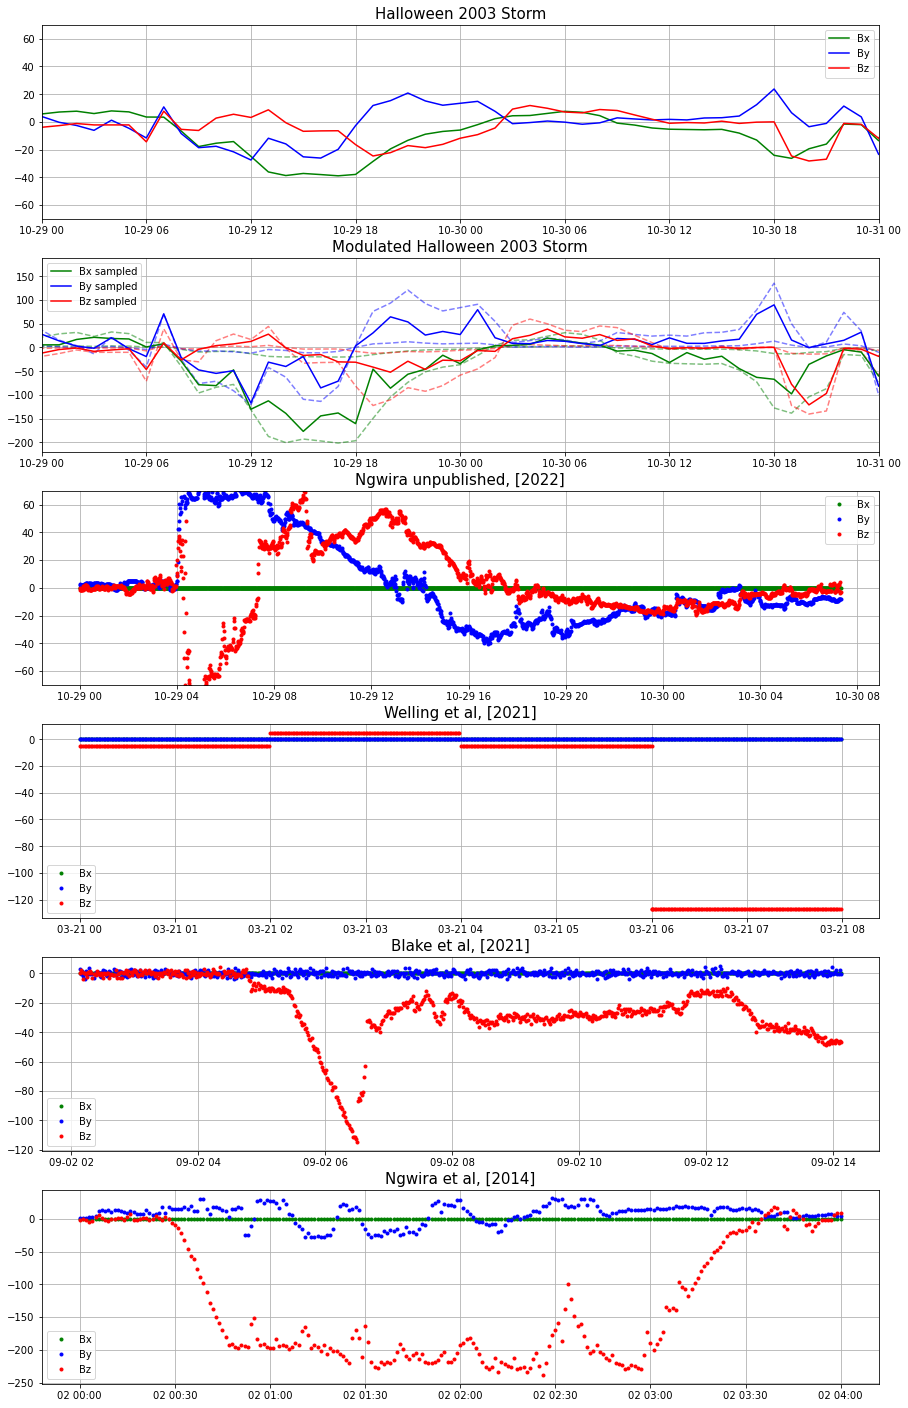

In [102]:
fig = plt.figure(figsize=(15,25))

ylim_low = -70
ylim_high = 70

ax1 = fig.add_subplot(611)
# ax1.plot(pd_actual['datetimes'],
#          pd_actual['AE'],
#          'k.',
#          label='OMNI')
ax1.plot(pd_actual['datetimes'],
         pd_actual['Bx'],
         'g-',
         label='Bx')
ax1.plot(pd_actual['datetimes'],
         pd_actual['By'],
         'b-',
         label='By')
ax1.plot(pd_actual['datetimes'],
         pd_actual['Bz'],
         'r-',
         label='Bz')
plt.legend()

plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
# plt.text(pd_actual['datetimes'][np.floor(len(pd_actual['datetimes'])/4)],
#          np.percentile(pd_actual['Bz'],0.75),
#          label_actual,
#          fontsize=15,)
plt.title(label_actual,
         fontsize=15,)
plt.grid(True)


ax2 = fig.add_subplot(612)
ax2.plot(pd_event1_plus['datetimes'],
         pd_event1_plus['Bx'],
         'g--',
         alpha=0.5,
         label='')
#          label='Bx plus')
ax2.plot(pd_event1_plus['datetimes'],
         pd_event1_plus['By'],
         'b--',
         alpha=0.5,
         label='')
#          label='By plus')
ax2.plot(pd_event1_plus['datetimes'],
         pd_event1_plus['Bz'],
         'r--',
         alpha=0.5,
         label='')
#          label='Bz plus')

ax2.plot(pd_event1_minus['datetimes'],
         pd_event1_minus['Bx'],
         'g--',
         alpha=0.5,
         label='')
#          label='Bx minus')
ax2.plot(pd_event1_minus['datetimes'],
         pd_event1_minus['By'],
         'b--',
         alpha=0.5,
         label='')
#          label='By minus')
ax2.plot(pd_event1_minus['datetimes'],
         pd_event1_minus['Bz'],
         'r--',
         alpha=0.5,
         label='')
#          label='Bz minus')


ax2.plot(pd_event1_sampled['datetimes'],
         pd_event1_sampled['Bx'],
         'g-',
         label='Bx sampled')
ax2.plot(pd_event1_sampled['datetimes'],
         pd_event1_sampled['By'],
         'b-',
         label='By sampled')
ax2.plot(pd_event1_sampled['datetimes'],
         pd_event1_sampled['Bz'],
         'r-',
         label='Bz sampled')

plt.legend()
plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
# plt.text(pd_event1_sampled['datetimes'][np.floor(len(pd_event1_sampled['datetimes'])/4)],
#          np.percentile(pd_event1_sampled['Bz'],0.75),
#          label1,
#          fontsize=15,)
plt.title(label1,
         fontsize=15,)
plt.grid(True)
plt.legend()


ax3 = fig.add_subplot(613)
ax3.plot(pd_event2['datetimes'],
         pd_event2['Bx'],
         'g.',
         label='Bx')
ax3.plot(pd_event2['datetimes'],
         pd_event2['By'],
         'b.',
         label='By')
ax3.plot(pd_event2['datetimes'],
         pd_event2['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
# plt.text(pd_event2['datetimes'][np.floor(len(pd_event2['datetimes'])/4)],
#          np.percentile(pd_event2['Bz'],0.75),
#          label2,
#          fontsize=15,)
plt.title(label2,
         fontsize=15,)
plt.grid(True)
plt.legend()


ax4 = fig.add_subplot(614)
ax4.plot(pd_event3['datetimes'],
         pd_event3['Bx'],
         'g.',
         label='Bx')
ax4.plot(pd_event3['datetimes'],
         pd_event3['By'],
         'b.',
         label='By')
ax4.plot(pd_event3['datetimes'],
         pd_event3['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
# plt.text(pd_event3['datetimes'][np.floor(len(pd_event3['datetimes'])/4)],
#          np.percentile(pd_event3['Bz'],0.75),
#          label3,
#          fontsize=15,)
plt.title(label3,
         fontsize=15,)
plt.grid(True)
plt.legend()

ax4 = fig.add_subplot(615)
ax4.plot(pd_event4['datetimes'],
         pd_event4['Bx'],
         'g.',
         label='Bx')
ax4.plot(pd_event4['datetimes'],
         pd_event4['By'],
         'b.',
         label='By')
ax4.plot(pd_event4['datetimes'],
         pd_event4['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
# plt.text(pd_event4['datetimes'][np.floor(len(pd_event4['datetimes'])/4)],
#          np.percentile(pd_event4['Bz'],0.75),
#          label4,
#          fontsize=15,)
plt.title(label4,
         fontsize=15,)
plt.grid(True)
plt.legend()



ax5 = fig.add_subplot(616)
ax5.plot(pd_event5['datetimes'],
         pd_event5['Bx'],
         'g.',
         label='Bx')
ax5.plot(pd_event5['datetimes'],
         pd_event5['By'],
         'b.',
         label='By')
ax5.plot(pd_event5['datetimes'],
         pd_event5['Bz'],
         'r.',
         label='Bz')
# plt.xlim(dt.datetime(2003,10,29),
#          dt.datetime(2003,10,31),)
# plt.ylim(ylim_low,ylim_high)
# plt.text(pd_event5['datetimes'][np.floor(len(pd_event5['datetimes'])/4)],
#          np.percentile(pd_event5['Bz'],0.75),
#          label5,
#          fontsize=15,)
plt.title(label5,
         fontsize=15,)
plt.grid(True)
plt.legend()


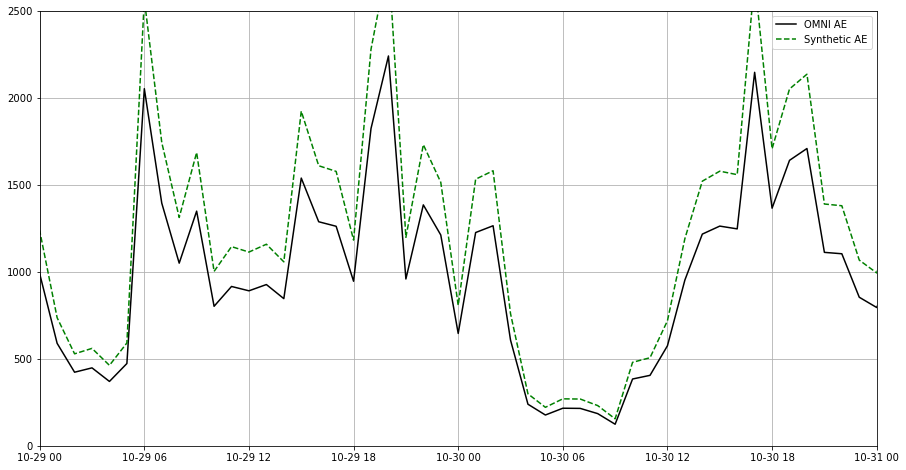

In [187]:
fig = plt.figure(figsize=(15,8))

ylim_low = 0
ylim_high = 2500

ax1 = fig.add_subplot(111)

ax1.plot(pd_actual['datetimes'],
         pd_actual['AE'],
         'k-',
         label='OMNI AE')

ax1.plot(pd_event1['datetimes'],
         pd_event1['AE'],
         'g--',
         label='Synthetic AE')

plt.legend()

plt.xlim(dt.datetime(2003,10,29),
         dt.datetime(2003,10,31),)
plt.ylim(ylim_low,ylim_high)
plt.grid(True)

